In [1]:
#importing Required Modules
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

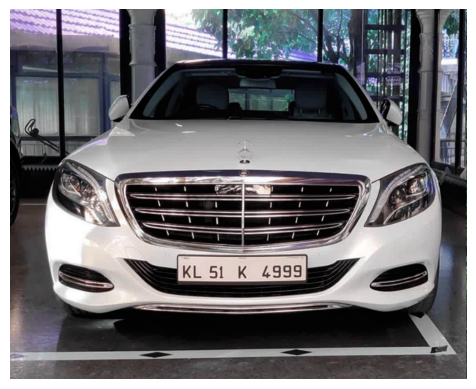

In [2]:
# Reading Image, resizing it and Displaying it

img = cv2.imread('image (2).jpg',cv2.IMREAD_COLOR)
#img = cv2.resize(img, (700,400) )

plt.imshow(img)
plt.axis('off')
plt.show()

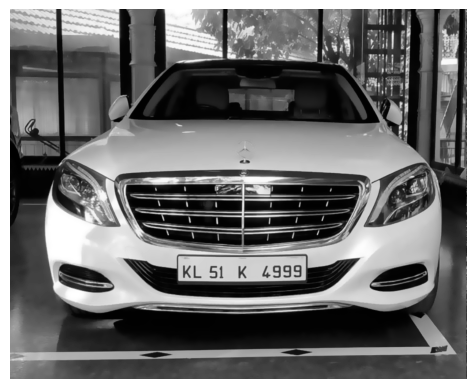

In [3]:
#grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15)

plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

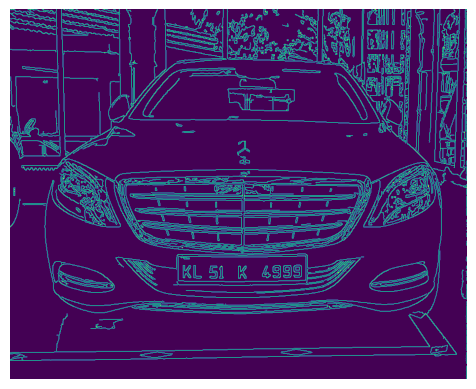

In [4]:
#edgeing 
edged = cv2.Canny(gray, 30, 200) 

plt.imshow(edged)
plt.axis('off')
plt.show()

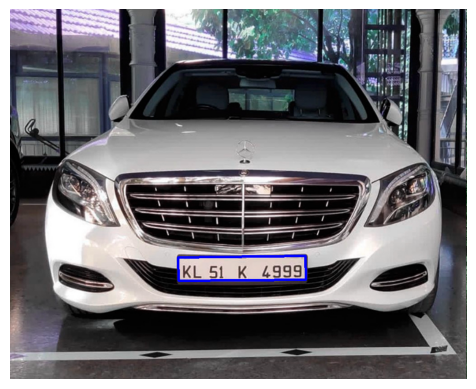

In [5]:
#detecting number plate

contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

    
plt.imshow(img)
plt.axis('off')
plt.show()

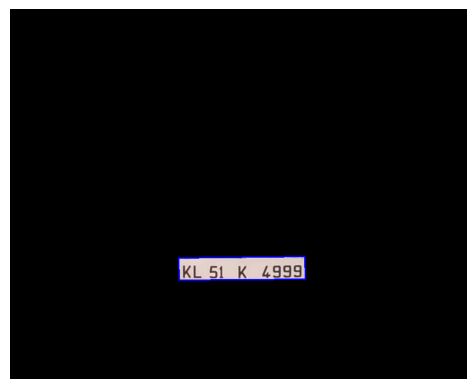

In [6]:
#Masking
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)


plt.imshow(new_image)
plt.axis('off')
plt.show()


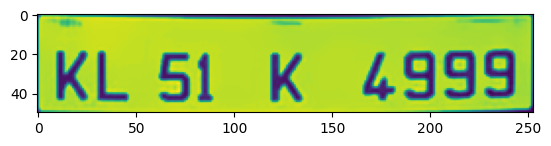

In [7]:
#ploting 

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
cropped = gray[topx:bottomx+1, topy:bottomy+1]


plt.imshow(cropped)
plt.show()

In [8]:
print("The Detected Number Plate")
print(pytesseract.image_to_string(cropped, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))


The Detected Number Plate
KL51K4999



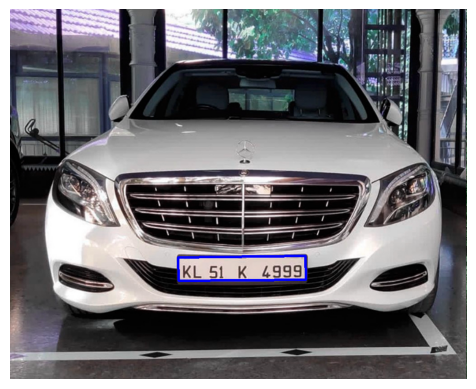

In [9]:
plt.imshow(img)
plt.axis('off')
plt.show()